Importing the librairies


In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report,precision_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [79]:
data = pd.read_csv('data\Tumeurs.csv')

In [80]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

In [81]:
X = X/255

### Reduce to have the same size in dataset

Before we have to compute to have the same size : 

In [82]:
data_to_reduce4 = data[data['label']== 4]
print(len(data_to_reduce4))
data_to_reduce4 = data_to_reduce4.sample(frac=0.015, replace=True, random_state=0)
print(len(data_to_reduce4))

data_to_reduce6 = data[data['label']== 6]
data_to_reduce6 = data_to_reduce6.sample(frac=0.091, replace=True, random_state=0)

data_to_reduce2 = data[data['label']== 2]
data_to_reduce2 = data_to_reduce2.sample(frac=0.091, replace=True, random_state=0)

data_to_reduce1 = data[data['label']== 1]
data_to_reduce1 = data_to_reduce1.sample(frac=0.2, replace=True, random_state=0)

data_to_reduce0 = data[data['label']== 0]

data_to_reduce0 = data_to_reduce0.sample(frac=0.33, replace=True, random_state=0)

data_to_reduce5 = data[data['label']== 5]
data_to_reduce3 = data[data['label']== 3]


data_stabled = pd.concat((data_to_reduce4, data_to_reduce6, data_to_reduce2, data_to_reduce1, data_to_reduce0, data_to_reduce5,data_to_reduce3))

6705
101


In [83]:
data_stabled


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
5707,169,170,172,174,160,173,177,173,172,169,...,177,176,170,154,148,121,133,165,165,4
5582,165,170,172,171,170,168,171,177,184,187,...,169,167,169,172,172,177,170,161,154,4
4628,166,171,176,177,178,164,172,180,181,178,...,169,166,171,172,170,165,156,162,164,4
6239,175,172,169,179,171,162,165,159,160,165,...,162,158,160,168,172,170,174,172,167,4
7908,161,159,159,163,164,163,163,163,162,159,...,162,160,160,161,159,160,162,159,156,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,207,209,212,208,204,203,209,217,218,218,...,213,210,218,219,215,212,205,199,199,3
1206,173,187,193,191,197,195,198,203,201,199,...,194,194,199,201,207,202,190,181,182,3
1207,180,188,179,172,175,181,178,174,172,174,...,137,143,146,147,150,152,149,148,142,3
1208,160,161,162,165,164,156,155,160,168,166,...,162,158,157,157,157,153,153,154,151,3


The data is stable. Let's create our NN 

In [84]:
y = data_stabled['label'].copy()
X = data_stabled.drop('label', axis=1).copy()

X = np.array(X)
X = X.reshape(770 ,28,28,1)

#X = X.reshape(4408,28,28,1)

#Scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.1, random_state=1)


In [85]:
y.value_counts()

5    142
3    115
0    108
1    103
4    101
6    101
2    100
Name: label, dtype: int64

Callback 

In [86]:
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [87]:
model =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu" , input_shape = (28, 28, 1)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") , 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu") ,    
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(rate = 0.15), #Important parameter

    tf.keras.layers.Dense(units = 256, activation = 'relu'), 

    tf.keras.layers.Dense(units = 64, activation = 'relu'), 
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(), #Convert 3d in 2d features vectors 
 
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(7,activation = "softmax")])

In [88]:
#model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100,callbacks = [early], validation_data=(X_val, y_val))
#history = model.fit(X_train, y_train, epochs=100,callbacks = [early])

Epoch 1/100


c:\Users\mathi\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


7/7 [==============================] - 1s 39ms/step - loss: 2.5912 - accuracy: 0.1691 - val_loss: 19.0343 - val_accuracy: 0.1667
Epoch 2/100
7/7 [==============================] - 0s 18ms/step - loss: 2.1904 - accuracy: 0.1981 - val_loss: 5.4498 - val_accuracy: 0.2083
Epoch 3/100
7/7 [==============================] - 0s 18ms/step - loss: 2.0994 - accuracy: 0.2512 - val_loss: 8.1375 - val_accuracy: 0.2917
Epoch 4/100
7/7 [==============================] - 0s 20ms/step - loss: 2.0069 - accuracy: 0.2609 - val_loss: 7.8685 - val_accuracy: 0.2917
Epoch 5/100
7/7 [==============================] - 0s 19ms/step - loss: 1.9054 - accuracy: 0.2899 - val_loss: 6.7984 - val_accuracy: 0.2917
Epoch 6/100
7/7 [==============================] - 0s 18ms/step - loss: 1.9283 - accuracy: 0.1981 - val_loss: 6.1103 - val_accuracy: 0.2917
Epoch 7/100
7/7 [==============================] - 0s 18ms/step - loss: 1.9556 - accuracy: 0.2754 - val_loss: 5.9474 - val_accuracy: 0.2500
Epoch 8/100
7/7 [==============

In [89]:

print(model.summary())
tf.keras.utils.plot_model(model)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 128)        

In [90]:
model_acc = model.evaluate(X_test, y_test)[1]

print("Test Accuracy: {:.3f}%".format(model_acc * 100))

8/8 [==============================] - 0s 5ms/step - loss: 1.6680 - accuracy: 0.3636
Test Accuracy: 36.364%


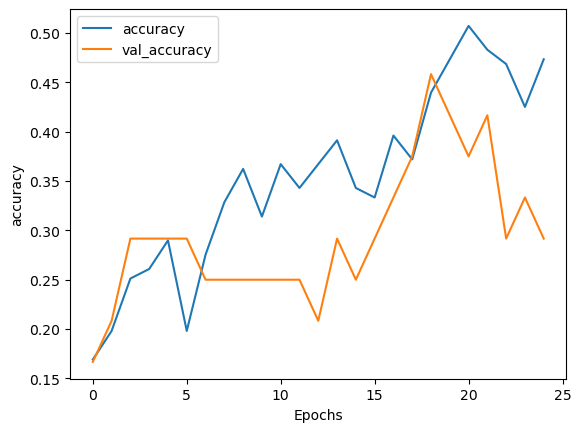

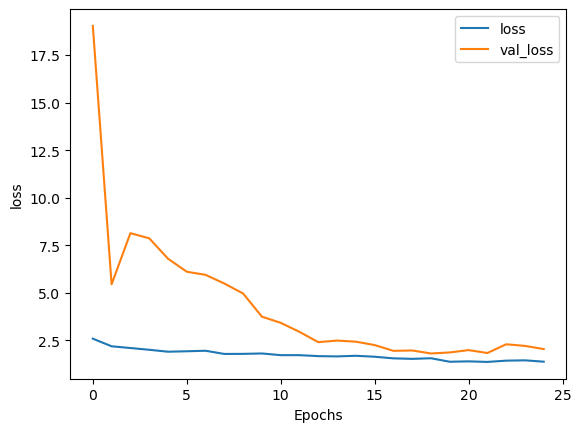

In [91]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
plt.show()

In [92]:
y_true = np.array(y_test)

label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

y_pred = model.predict(X_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))

cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=label_mapping.values())

c:\Users\mathi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mathi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mathi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c:\Users\mathi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mathi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mathi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.30      0.80      0.44        30
           1       0.00      0.00      0.00        29
           2       0.60      0.33      0.43        27
           3       0.37      0.59      0.45        37
           4       0.37      0.82      0.51        34
           5       1.00      0.02      0.04        44
           6       0.00      0.00      0.00        30

    accuracy                           0.36       231
   macro avg       0.38      0.37      0.27       231
weighted avg       0.41      0.36      0.26       231



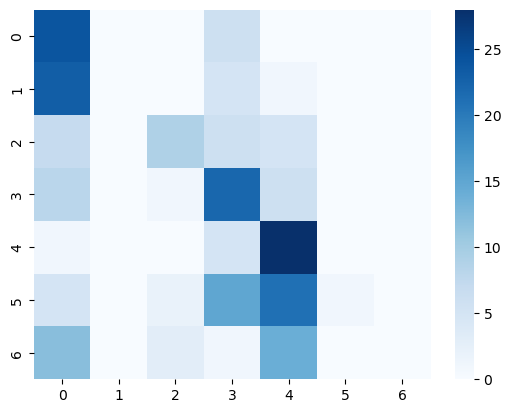

In [93]:
import seaborn as sn

y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
cr2 = classification_report(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, cmap='Blues')
print(cr2)
#print(cm) 

That's better.. Really 